파이썬 머신러닝 완벽 가이드 ch9.1-4 pg. 562~579

---

# CHAPTER 09 추천 시스템

## 01 추천 시스템의 개요와 배경

#### 추천 시스템의 유형

- 콘텐츠 기반 필터링
- 협업 필터링
 - 최근접 이웃 협업 필터링
 - 잠재 요인 협업 필터링

- 초창기에는 콘텐츠 기반 필터링이나 최근접 이웃 기반 협업 필터링 주로 사용
- 대부분의 온라인 스토어에서 잠재 요인 협업 필터링 기반의 추천 시스템 적용
- 하이브리드 형식으로 콘텐츠 기반과 협업 기반을 적절히 결합해 사용

## 02 콘텐츠 기반 필터링 추천 시스템

사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식

## 03 최근접 이웃 협업 필터링

`협업 필터링 방식`
- 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 `행동 양식`만을 기반으로 추천을 수행하는 것

- 주요 목표 : 사용자 행동 데이터를 기반으로(사용자가 평가한 다른 아이템을 기반으로) 사용자가 아직 평가하지 않은 아이템을 예측 평가

- 최근접 이웃 방식 , 잠재 요인 방식 : 두 방식 모두 `사용자-아이템 평점 행렬` 데이터에만 의지해 추천 수행

`사용자-아이템 평점 행렬`
- 행은 개별 사용자, 열은 개별 아이템, 해당값은 평점
- 레코드 레벨 형태라면 pivot_table()함수 이용해 사용자-아이템 평점 행렬 형태로 변경



- 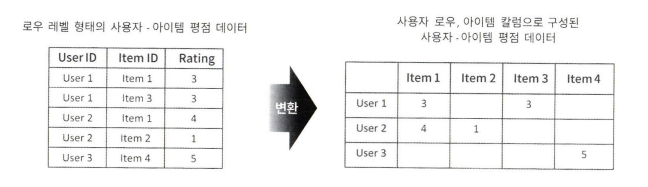

- 사용자가 아이템에 대한 평점을 매기는 경우가 많지 않아 희소 행렬 특성 가진다
- `최근접 이웃 협업 필터링` (= 메모리 협업 필터링)
 - 사용자 기반 : 당신과 비슷한 고객들이 다음 상품도 구매
 > 특정 사용자와 타 사용자 간의 유사도 측정한 뒤 가장 유사도가 높은 TOP-N 사용자 추출해 그들이 선호하는 아이템 추천


  - 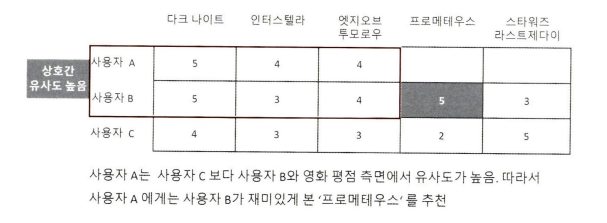

 - 아이템 기반 : 이 상품을 선택한 다른 고객들은 다음 상품도 구매
 > 아이템이 가지는 속성과는 상관없이 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘


- 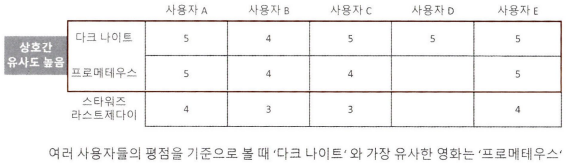

일반적으로 사용자 기반보다는 아이템 기반 협업 필터링이 정확도가 더 높다
- 비슷한 영화 좋아한다고 해서 사람들 취향 비슷하다고 판단하기는 어려운 경우가 많다.
- 대부분 아이템 기반 알고리즘 적용

## 04 잠재 요인 협업 필터링

### 잠재 요인 협업 필터링의 이해

`잠재 요인 협업 필터링`
- 사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 에측을 할 수 있게 하는 기법
- `행렬 분해` : 대규모 다차원 행렬을 차원 감소 기법으로 분해하는 과정에서 잠재 요인 추출하는 기법
- '잠재 요인'을 기반으로 다차원 희소 행렬인 사용자-아이템 행렬 데이터를 저차원 밀집 행렬의 사용자-잠재 요인 행렬과 아이템-잠재 요인 행렬의 전치 행렬로 분해 -> 분해된 두 행렬의 내적을 통해 새로운 예측 사용자-아이템 평점 행렬 데이터 만든다

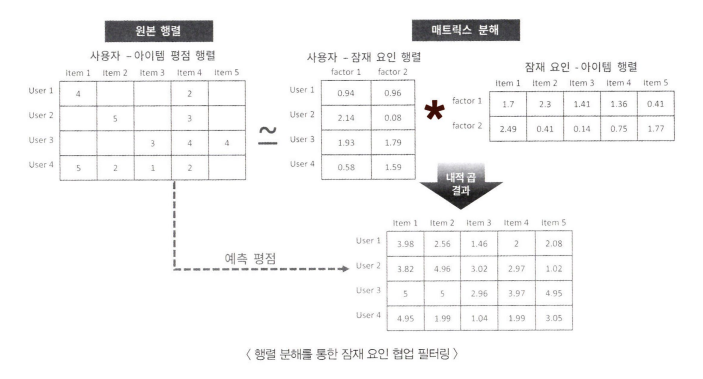

### 행렬 분해의 이해

`행렬 분해` : 다차원의 매트릭스를 저차원 매트릭스로 분해하는 기법
- 대표적으로 SVD, NMF 등
- 평점 행렬 R은 MxN 차원 -> 행렬 분해를 통해 사용자-K 차원 잠재 요인 행렬 P * K 차원 잠재 요인-아이템 행렬 Q.T 로 분해
- R = P*Q.T



- 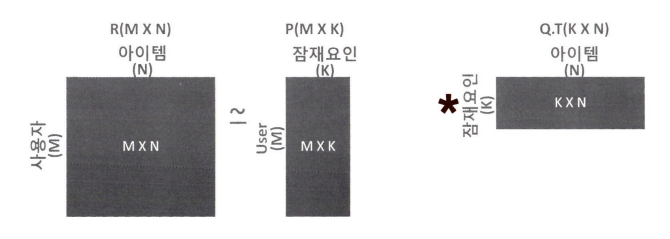

- M : 총 사용자 수
- N : 총 아이템 수
- K : 잠재 요인의 차원 수
- R : MxN 차원의 사용자-아이템 평점 행렬
- P : 사용자와 잠재 요인과의 관계 값을 가지는 - MxK 차원의 사용자-잠재 요인 행렬
- Q : 아이템과 잠재 요인과의 관계 값을 가지는 NxK 차원의 아이템-잠재 요인 행렬


행렬 분해는 주로 SVD 방식 이용
- 널이 없는 행렬에만 적용 가능
- 널 값이 있는 경우에는 확률적 경사 하강법이나 ALS 방식 이용해 SVD 수행

### 확률적 경사 하강법을 이용한 행렬 분해

P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추해내는 것

1. P와 Q를 임의의 값을 가진 행렬로 설정
2. P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값 계산
3. 이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트
4. 만족할 만한 오류 값을 가질 때까지 2,3번 작업을 반복하면서 P,Q 값을 업데이트해 근사화

일반적으로 사용자-아이템 평점 행렬의 경우 행렬 분해를 위해서 단순히 예측 오류값의 최소화와 학습시 과적합을 피하기 위해서 규제를 반영한 비용 함수 적용

SGD 기반의 행렬 분해 : L2 규제를 반영해 실제 R 행렬 값과 예측 R 행렬 값의 차이를 최소화하는 방향성을 가지고 P행렬과 Q행렬에 업데이트 값을 반복적으로 수행하면서 최적화된 예측 R 행렬을 구하는 방식

In [1]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재요인 차원 K는 3으로 설정.
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN],
            [np.NaN, 5, np.NaN, 3, 1],
            [np.NaN, np.NaN, 3, 4, 4],
            [5,2,1,2,np.NaN]])
num_users, num_items=R.shape
K = 3

# P와 Q의 행렬 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [2]:
# 실제 R 행렬과 예측 행렬의 오차를 구하는 get_rmse() 함수 생성
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
  error = 0
  # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
  full_pred_matrix = np.dot(P, Q.T)

  # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스를 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

SGD 기반으로 행렬 분해 수행
- steps : SGD를 반복해서 업데이트할 횟수
- learning_rate : SGD의 학습률
- r_lambda : L2 Regularization 계수

In [3]:
# R>0인 행과 열의 위치, 값을 non_zeros 리스트에 저장
non_zeros = [ (i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j]>0]
steps = 1000
learning_rate = 0.01
r_lambda = 0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
  for i, j, r in non_zeros:
    # 실제 값과 예측 값의 차이인 오류 값 구함
    eij = r - np.dot(P[i, :], Q[j, :].T)
    # Regularization을 반영한 SGD 업데이트 공식 적용
    P[i, :] = P[i, :] + learning_rate*(eij*Q[j, :]-r_lambda*P[i, :])
    Q[j, :] = Q[j, :] + learning_rate*(eij*P[i, :]-r_lambda*Q[j, :])
  rmse = get_rmse(R, P, Q, non_zeros)
  if (step%50) == 0:
    print('### iteration step : ', step, 'rmse : ', rmse)

### iteration step :  0 rmse :  3.2388050277987723
### iteration step :  50 rmse :  0.4876723101369648
### iteration step :  100 rmse :  0.1564340384819247
### iteration step :  150 rmse :  0.07455141311978046
### iteration step :  200 rmse :  0.04325226798579314
### iteration step :  250 rmse :  0.029248328780878973
### iteration step :  300 rmse :  0.022621116143829466
### iteration step :  350 rmse :  0.019493636196525135
### iteration step :  400 rmse :  0.018022719092132704
### iteration step :  450 rmse :  0.01731968595344266
### iteration step :  500 rmse :  0.016973657887570753
### iteration step :  550 rmse :  0.016796804595895633
### iteration step :  600 rmse :  0.01670132290188466
### iteration step :  650 rmse :  0.01664473691247669
### iteration step :  700 rmse :  0.016605910068210026
### iteration step :  750 rmse :  0.016574200475705
### iteration step :  800 rmse :  0.01654431582921597
### iteration step :  850 rmse :  0.01651375177473524
### iteration step :  900 rms

In [4]:
# 분해된 P와 Q 함수를 P*Q.T로 예측 행렬을 만들어 출력
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
